In [40]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

In [41]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 100
lr = 1e-3
n_epochs = 10

In [42]:
mnist_train = datasets.MNIST(root='MNIST_data/', train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root='MNIST_data/', train=False, transform=transforms.ToTensor(), download=True)
dloader = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)

In [43]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        ) # -> 32 X 14 X 14
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        ) # -> 64 X 7 X 7
        self.fc = nn.Linear(64 * 7 * 7, 10, bias=True)
        nn.init.xavier_uniform_(self.fc.weight)
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1) # out.size(0): size of a batch
        return self.fc(out)

epoch: 1/10	loss: 0.239954
accuracy: 96.36%
epoch: 2/10	loss: 0.068329
accuracy: 97.66%
epoch: 3/10	loss: 0.049081
accuracy: 98.41%
epoch: 4/10	loss: 0.039041
accuracy: 98.52%
epoch: 5/10	loss: 0.032801
accuracy: 98.38%
epoch: 6/10	loss: 0.027146
accuracy: 98.55%
epoch: 7/10	loss: 0.024567
accuracy: 98.81%
epoch: 8/10	loss: 0.020123
accuracy: 98.37%
epoch: 9/10	loss: 0.017313
accuracy: 98.88%
epoch: 10/10	loss: 0.014225
accuracy: 98.50%


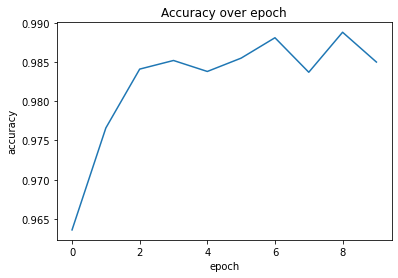

In [44]:
model = CNN().to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

accuracies = []
for epoch in range(1, n_epochs + 1):
    loss_sum = 0
    for b_idx, batch in enumerate(dloader):
        imgs, targets = batch
        imgs, targets = imgs.to(device), targets.to(device)
        loss = loss_func(model(imgs), targets)

        optimizer.zero_grad()
        
        loss.backward()
        optimizer.step()
        loss_sum += loss.item()
    
    print(f'epoch: {epoch}/{n_epochs}\tloss: {loss_sum / len(dloader):.6f}')
    with torch.no_grad():
        imgs = mnist_test.data.view(len(mnist_test), 1, 28, 28).float().to(device)
        targets = mnist_test.targets.to(device)
        accuracy = (torch.argmax(model(imgs), dim=1) == targets).float().mean().item()
        print(f'accuracy: {accuracy * 100:.2f}%')
        accuracies.append(accuracy)
plt.title('Accuracy over epoch')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(accuracies)

[Reference](https://wikidocs.net/63565)